In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
run utils.py

C:\Users\Noam\AppData\Local\Temp\ipykernel_11584\1780013115.py:3: DeprecationWarning: This function is deprecated. Please call randint(-5, 5 + 1) instead
  d = np.random.random_integers(-5, 5, 100)


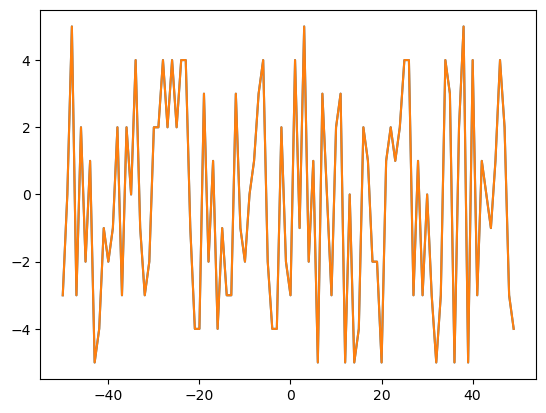

In [28]:
T = 0.001
r = np.arange(-100, 100, T)
d = np.random.random_integers(-5, 5, 100)
a = sp.signal.bspline(np.arange(-4, 4, T), 1)
x = np.zeros(r.size)
t0 = -1/T*50
for i, dk in enumerate(d):
    x[100000+int(t0 + 1/T*i-4/T):100000+int(t0 + 1/T*i+4/T)] += a*dk
# plt.plot(x)

s = sp.signal.bspline(np.arange(-4, 4, T), 2)
xs = sp.signal.convolve(x,s,mode="same")
ck = xs[np.arange(0, xs.size, int(1/T))]*T

rsa = sp.signal.convolve(a,s, mode="same")*T
rsak = rsa[np.arange(0,rsa.size, int(1/T))]
R = dtft(rsak, np.arange(-4, 4, 1))
H = 1/R
h = idtft(np.arange(-10,11), H)
# plt.plot(np.arange(0,rsa.size, int(1/T)), rsak)
# plt.plot(rsa)
d_recovered = sp.signal.convolve(ck, h, mode="same")
plt.plot(np.arange(-50, 50), d_recovered[50:-50])
plt.plot(np.arange(-50,50), d)